### Source: 


### The MNIST dataset
The MNIST dataset is available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

* Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 samples)
* Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)
* Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 samples)
* Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)
* In this section, we will only be working with a subset of MNIST, thus, we only need to download the training set images and training set labels.

After downloading the files, simply run the next code cell to unzip the files.



In [0]:
# this code cell unzips mnist

import sys
import gzip
import shutil
import os

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('./') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

In [0]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

In [0]:
!ls # Output contents of directory

sample_data		t10k-labels-idx1-ubyte	 train-labels-idx1-ubyte
t10k-images-idx3-ubyte	train-images-idx3-ubyte


### Side topic about reshape

numpy.reshape(a, newshape, order='C')

* Gives a new shape to an array without changing its data.

Parameters:	
* a : array_like
Array to be reshaped.

* newshape : int or tuple of ints
The new shape should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.

* order : {‘C’, ‘F’, ‘A’}, optional
Read the elements of a using this index order, and place the elements into the reshaped array using this index order. ‘C’ means to read / write the elements using C-like index order, with the last axis index changing fastest, back to the first axis index changing slowest. ‘F’ means to read / write the elements using Fortran-like index order, with the first index changing fastest, and the last index changing slowest. Note that the ‘C’ and ‘F’ options take no account of the memory layout of the underlying array, and only refer to the order of indexing. ‘A’ means to read / write the elements in Fortran-like index order if a is Fortran contiguous in memory, C-like order otherwise.

* Returns:	
reshaped_array : ndarray
This will be a new view object if possible; otherwise, it will be a copy. Note there is no guarantee of the memory layout (C- or Fortran- contiguous) of the returned array.


In [0]:
a = np.arange(10)
print('pre-reshape: ', a)

a = np.arange(10).reshape((5,2))
print('post-reshape: \n', a)

a = np.arange(20).reshape(5,4)
print('p: ', a)

a = np.array([[2, 4, 5], [99, 109, 23]])
print('pre: ', a)

a = np.reshape(a, (3,2))
print('post: ', a)

a = np.reshape(a, 6)
print('post: ', a)

pre-reshape:  [0 1 2 3 4 5 6 7 8 9]
post-reshape: 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
p:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
pre:  [[  2   4   5]
 [ 99 109  23]]
post:  [[  2   4]
 [  5  99]
 [109  23]]
post:  [  2   4   5  99 109  23]


In [0]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [0]:
X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


### Visualize the first digit of each class: 

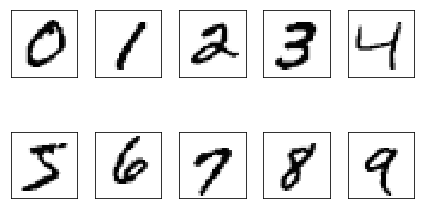

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

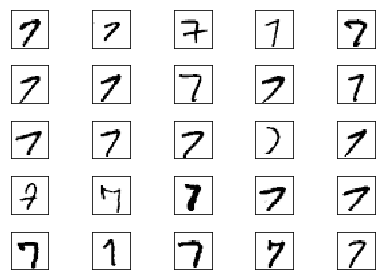

In [0]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

In [0]:
import numpy as np

np.savez_compressed('mnist_scaled.npz', 
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

### Detour on some pandas concepts


In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

ch = pd.read_csv(url, sep = '\t')

ch.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [0]:
# shape[1] is the num of columns
ch.shape[1]

5

In [0]:
# shape[0] is the num of rows
ch.shape[0]

4622

In [0]:
ch.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [0]:
ch.index

RangeIndex(start=0, stop=4622, step=1)

In [0]:
# Sort by highest quantity of an item sold
lar = lar.sort_values(['quantity'], ascending = False)
lar

,order_id,quantity
item_price,,
$44.25,1443.000000,15.0
$15.00,1660.000000,10.0
$13.52,1559.000000,8.0
$10.50,1443.000000,7.0
$7.50,970.000000,5.0
$35.00,977.000000,4.0
$11.80,511.000000,4.0
$4.36,901.000000,4.0
$5.00,1721.333333,4.0
